### Importing all necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  


### Reading the File

In [2]:
churn = pd.read_csv('Churn Modeling.csv')
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Performing Inferential Statistics and Understanding the data

In [3]:
churn.describe()

#From the below, we can observe the basic statistics

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#Seeing the columns present in churn dataframe
churn.columns 


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
#Checking the shape of the dataset:

churn.shape

(10000, 14)

In [7]:
#Checking the size of the dataset: 

churn.size

140000

### Checking whether any Null values are present in the Data

In [8]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
churn.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Detecting Outliers by plotting Box-plots and Replacing the Outliers with mean value

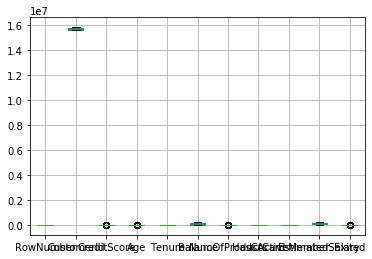

In [10]:
#Creating the boxplot for the churn dataframe:

boxplot = churn.boxplot()

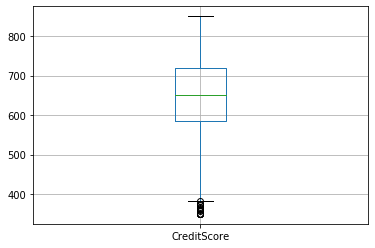

In [11]:
#Creating the boxplot for CreditScore feature:

churn.boxplot(column=['CreditScore'])

In [12]:
#Remove the outliers for the CreditScore feature:

Q1 = churn['CreditScore'].quantile(0.25)
Q3 = churn['CreditScore'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter1 = (churn['CreditScore'] >= Q1 - 1.5 * IQR) & (churn['CreditScore'] <= Q3 + 1.5 *IQR)
print('Number of Outliers detected in the feature CreditScore is %d' %(len(filter1)- len(churn.loc[filter1])))


Number of Outliers detected in the feature CreditScore is 15


In [13]:
#Replacing the outliers with mean of the feature:
new_churn = churn.copy()
new_churn.where(filter1,inplace= True)
mean_value = new_churn['CreditScore'].mean()
new_churn['CreditScore'].fillna(value=mean_value, inplace=True)

In [14]:
new_churn.shape

(10000, 14)

In [15]:
new_churn['CreditScore'].isnull().sum()

0

Number of Outliers detected in the feature CreditScore is 359


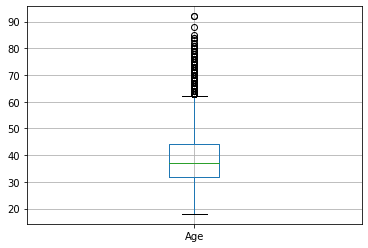

In [16]:
#Creating the boxplot for Age feature and identifying the outliers:
churn.boxplot(column=['Age'])
Q1 = churn['Age'].quantile(0.25)
Q3 = churn['Age'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
filter2 = (churn['Age'] >= Q1 - 1.5 * IQR) & (churn['Age'] <= Q3 + 1.5 *IQR)
print('Number of Outliers detected in the feature CreditScore is %d' %(len(filter2)- len(churn.loc[filter2])))

#Replacing the outliers with the feature:
new_churn['Age'].where(filter2,inplace= True)
mean_value = new_churn['Age'].mean()
new_churn['Age'].fillna(value=mean_value, inplace=True)

In [17]:
new_churn['Age'].isnull().sum()

0

Number of Outliers detected in the feature CreditScore is 0


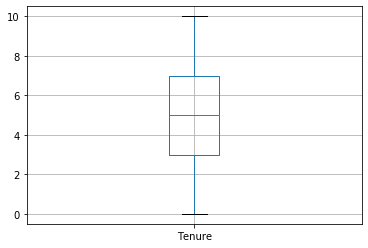

In [18]:
##Creating the boxplot for Tenure feature and identifying the outliers:
churn.boxplot(column=['Tenure'])
Q1 = churn['Tenure'].quantile(0.25)
Q3 = churn['Tenure'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
filter3 = (churn['Tenure'] >= Q1 - 1.5 * IQR) & (churn['Tenure'] <= Q3 + 1.5 *IQR)
print('Number of Outliers detected in the feature CreditScore is %d' %(len(filter3)- len(churn.loc[filter3])))

#Replacing the outliers with mean of the feature:
new_churn['Tenure'].where(filter3,inplace= True)
mean_value = new_churn['Tenure'].mean()
new_churn['Tenure'].fillna(value=mean_value, inplace=True)

Number of Outliers detected in the feature CreditScore is 0


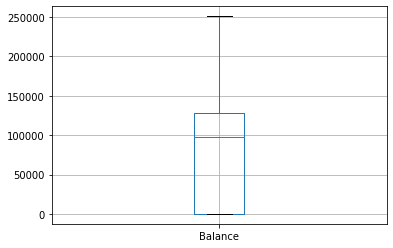

In [19]:
##Creating the boxplot for Balance feature and identifying the outliers:
churn.boxplot(column=['Balance'])
Q1 = churn['Balance'].quantile(0.25)
Q3 = churn['Balance'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter4 = (churn['Balance'] >= Q1 - 1.5 * IQR) & (churn['Balance'] <= Q3 + 1.5 *IQR)
print('Number of Outliers detected in the feature CreditScore is %d' %(len(filter4)- len(churn.loc[filter4])))

#Replacing the outliers with the mean of the feature:
new_churn['Balance'].where(filter4,inplace= True)
mean_value = new_churn['Balance'].mean()
new_churn['Balance'].fillna(value=mean_value, inplace=True)

Number of Outliers detected in the feature CreditScore is 0


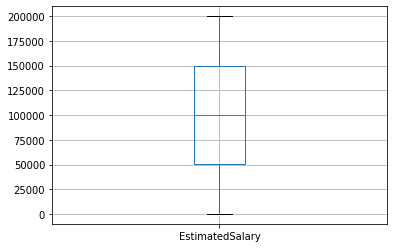

In [20]:
##Creating the boxplot for EstimatedSalary feature and identifying the outliers:
churn.boxplot(column=['EstimatedSalary'])
Q1 = churn['EstimatedSalary'].quantile(0.25)
Q3 = churn['EstimatedSalary'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquEstimatedSalary 

filter5 = (churn['EstimatedSalary'] >= Q1 - 1.5 * IQR) & (churn['EstimatedSalary'] <= Q3 + 1.5 *IQR)
print('Number of Outliers detected in the feature CreditScore is %d' %(len(filter5)- len(churn.loc[filter5])))
      
#Replacing the outliers with the mean of the feature:
new_churn['EstimatedSalary'].where(filter5,inplace= True)
mean_value = new_churn['EstimatedSalary'].mean()
new_churn['EstimatedSalary'].fillna(value=mean_value, inplace=True)

In [21]:
new_churn.isnull().sum()

RowNumber          15
CustomerId         15
Surname            15
CreditScore         0
Geography          15
Gender             15
Age                 0
Tenure              0
Balance             0
NumOfProducts      15
HasCrCard          15
IsActiveMember     15
EstimatedSalary     0
Exited             15
dtype: int64

In [22]:
#Dropping the null rows in the new_churn data frame:

new_churn = new_churn.dropna()

In [23]:
new_churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Seeing the Dataset after removing all outliers and treating missing values

In [24]:
new_churn.shape

(9985, 14)

In [25]:
new_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


### Understanding the Distributions of Features 

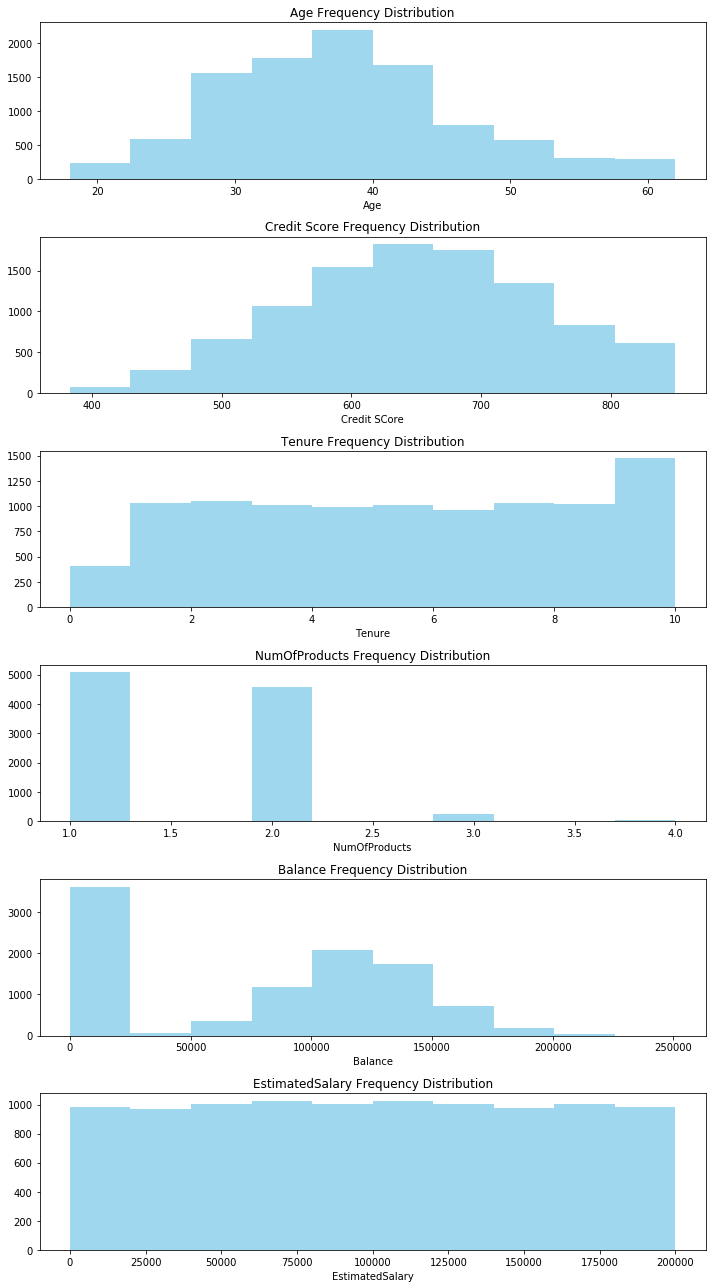

In [26]:
#Frequency distribution of ages
fig,ax=plt.subplots(6,figsize=(10,18))
ax[0].hist(new_churn['Age'],alpha=0.8,color ='skyblue')
ax[0].set_title("Age Frequency Distribution")
ax[0].set_xlabel('Age')
ax[1].hist(new_churn['CreditScore'],alpha=0.8,color ='skyblue')
ax[1].set_title("Credit Score Frequency Distribution")
ax[1].set_xlabel('Credit SCore')
ax[2].hist(new_churn['Tenure'],alpha=0.8,color ='skyblue')
ax[2].set_title("Tenure Frequency Distribution")
ax[2].set_xlabel('Tenure')
ax[3].hist(new_churn['NumOfProducts'],alpha=0.8,color ='skyblue')
ax[3].set_title("NumOfProducts Frequency Distribution")
ax[3].set_xlabel('NumOfProducts')
ax[4].hist(new_churn['Balance'],alpha=0.8,color ='skyblue')
ax[4].set_title("Balance Frequency Distribution")
ax[4].set_xlabel('Balance')
ax[5].hist(new_churn['EstimatedSalary'],alpha=0.8,color ='skyblue')
ax[5].set_title("EstimatedSalary Frequency Distribution")
ax[5].set_xlabel('EstimatedSalary')

fig.tight_layout()
plt.show()

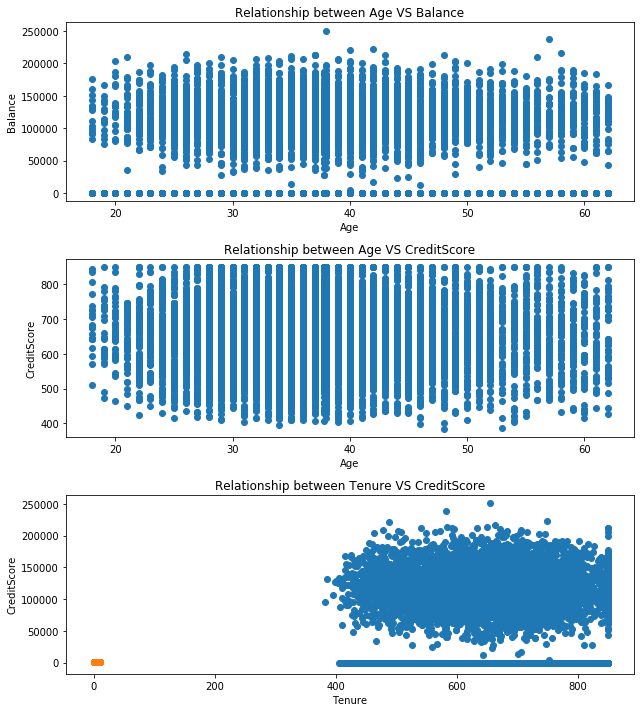

In [27]:
fig,ax=plt.subplots(3,figsize=(9,10))
ax[0].scatter(new_churn['Age'],new_churn["Balance"])
ax[0].set_title("Relationship between Age VS Balance")
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Balance')
ax[1].scatter(new_churn['Age'],new_churn["CreditScore"])
ax[1].set_xlabel('Age')
ax[1].set_ylabel('CreditScore')
ax[1].set_title("Relationship between Age VS CreditScore")
ax[2].scatter(new_churn['CreditScore'],new_churn["Balance"])
ax[2].set_xlabel('CreditScore')
ax[2].set_ylabel('Balance')
ax[2].set_title("Relationship between CreditScore VS Balance")

ax[2].scatter(new_churn['Tenure'],new_churn["CreditScore"])
ax[2].set_xlabel('Tenure')
ax[2].set_ylabel('CreditScore')
ax[2].set_title("Relationship between Tenure VS CreditScore")
fig.tight_layout()

plt.show()

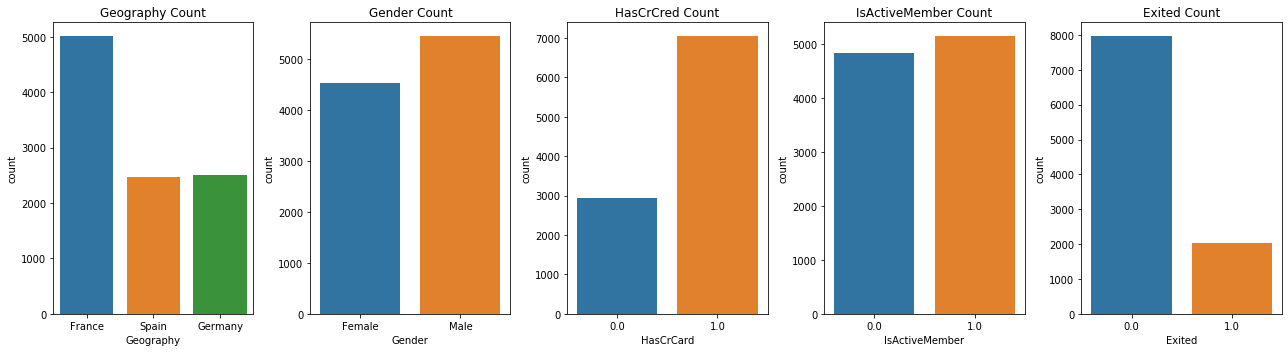

In [28]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
fig, ax =plt.subplots(1,5,figsize=(18,5))
# plt.xticks(rotation=90)
sns.countplot(new_churn["Geography"],ax=ax[0])
ax[0].set_title("Geography Count")
sns.countplot(new_churn["Gender"],ax=ax[1])
ax[1].set_title("Gender Count")
sns.countplot(new_churn["HasCrCard"],ax=ax[2])
ax[2].set_title("HasCrCred Count")
sns.countplot(new_churn["IsActiveMember"],ax=ax[3])
ax[3].set_title("IsActiveMember Count")
sns.countplot(new_churn["Exited"],ax=ax[4])
ax[4].set_title("Exited Count")

fig.tight_layout()

plt.show()

Text(0.5, 1, 'Correlation Matrix for Churn Rates')

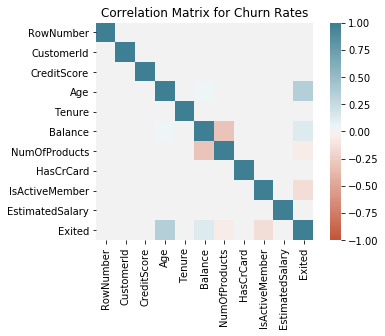

In [29]:
#Creating the correlation matrix for new_churn dataframe
corr = new_churn.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.title("Correlation Matrix for Churn Rates")

### Checking whether the features are Normally Distributed

In [30]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)

# creating the normality test
stat, p = shapiro(new_churn['CreditScore'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.993, p=0.000
Sample does not look Gaussian (reject H0)


In [31]:
# normality test
stat, p = shapiro(new_churn['Age'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.979, p=0.000
Sample does not look Gaussian (reject H0)


In [32]:
# normality test
stat, p = shapiro(new_churn['Tenure'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.949, p=0.000
Sample does not look Gaussian (reject H0)


In [33]:
# normality test
stat, p = shapiro(new_churn['Balance'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.846, p=0.000
Sample does not look Gaussian (reject H0)


In [34]:
# normality test
stat, p = shapiro(new_churn['EstimatedSalary'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.957, p=0.000
Sample does not look Gaussian (reject H0)


In [35]:
new_churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Performing One Hot Encoding and Normalizing the features

In [36]:
#Encoding the categorical features:

one_hot_encoded_data = pd.get_dummies(new_churn, columns = ['Geography', 'Gender','Tenure','NumOfProducts'])
one_hot_encoded_data

,RowNumber,CustomerId,Surname,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,Tenure_5.0,Tenure_6.0,Tenure_7.0,Tenure_8.0,Tenure_9.0,Tenure_10.0,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,NumOfProducts_4.0
0,1.0,15634602.0,Hargrave,619.0,42.0,0.00,1.0,1.0,101348.88,1.0,...,0,0,0,0,0,0,1,0,0,0
1,2.0,15647311.0,Hill,608.0,41.0,83807.86,0.0,1.0,112542.58,0.0,...,0,0,0,0,0,0,1,0,0,0
2,3.0,15619304.0,Onio,502.0,42.0,159660.80,1.0,0.0,113931.57,1.0,...,0,0,0,1,0,0,0,0,1,0
3,4.0,15701354.0,Boni,699.0,39.0,0.00,0.0,0.0,93826.63,0.0,...,0,0,0,0,0,0,0,1,0,0
4,5.0,15737888.0,Mitchell,850.0,43.0,125510.82,1.0,1.0,79084.10,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996.0,15606229.0,Obijiaku,771.0,39.0,0.00,1.0,0.0,96270.64,0.0,...,1,0,0,0,0,0,0,1,0,0
9996,9997.0,15569892.0,Johnstone,516.0,35.0,57369.61,1.0,1.0,101699.77,0.0,...,0,0,0,0,0,1,1,0,0,0
9997,9998.0,15584532.0,Liu,709.0,36.0,0.00,0.0,1.0,42085.58,1.0,...,0,0,1,0,0,0,1,0,0,0
9998,9999.0,15682355.0,Sabbatini,772.0,42.0,75075.31,1.0,0.0,92888.52,1.0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
new_churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [38]:
#Normalizing the numerical features : 

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
#min_max_scaler = MinMaxScaler()
names = one_hot_encoded_data.columns
one_hot_encoded_data[['CreditScore','Age','Balance','EstimatedSalary']] = scaler.fit_transform(one_hot_encoded_data[['CreditScore','Age','Balance','EstimatedSalary']])
one_hot_encoded_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,Tenure_5.0,Tenure_6.0,Tenure_7.0,Tenure_8.0,Tenure_9.0,Tenure_10.0,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,NumOfProducts_4.0
0,1.0,15634602.0,Hargrave,0.505353,0.545455,0.000000,1.0,1.0,0.506735,1.0,...,0,0,0,0,0,0,1,0,0,0
1,2.0,15647311.0,Hill,0.481799,0.522727,0.334031,0.0,1.0,0.562709,0.0,...,0,0,0,0,0,0,1,0,0,0
2,3.0,15619304.0,Onio,0.254818,0.545455,0.636357,1.0,0.0,0.569654,1.0,...,0,0,0,1,0,0,0,0,1,0
3,4.0,15701354.0,Boni,0.676660,0.477273,0.000000,0.0,0.0,0.469120,0.0,...,0,0,0,0,0,0,0,1,0,0
4,5.0,15737888.0,Mitchell,1.000000,0.568182,0.500246,1.0,1.0,0.395400,0.0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
one_hot_encoded_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Balance',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male', 'Tenure_0.0', 'Tenure_1.0',
       'Tenure_2.0', 'Tenure_3.0', 'Tenure_4.0', 'Tenure_5.0', 'Tenure_6.0',
       'Tenure_7.0', 'Tenure_8.0', 'Tenure_9.0', 'Tenure_10.0',
       'NumOfProducts_1.0', 'NumOfProducts_2.0', 'NumOfProducts_3.0',
       'NumOfProducts_4.0'],
      dtype='object')

### Splitting the data into Train-test datasets

In [40]:
from sklearn.model_selection import train_test_split
X = one_hot_encoded_data.drop(['RowNumber', 'CustomerId', 'Surname','Exited'], axis=1)
Y = one_hot_encoded_data[['Exited']]

#Test size data is 33.33% and train size data is 66.66%
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [41]:
x_train.head()

,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,...,Tenure_5.0,Tenure_6.0,Tenure_7.0,Tenure_8.0,Tenure_9.0,Tenure_10.0,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,NumOfProducts_4.0
5553,0.605996,0.295455,0.491084,1.0,1.0,0.560782,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8511,0.556745,0.227273,0.641129,1.0,0.0,0.135701,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
5406,0.284797,0.659091,0.435983,0.0,0.0,0.606827,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
7707,0.995717,0.386364,0.478468,1.0,0.0,0.423536,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1206,0.430407,0.318182,0.000000,1.0,0.0,0.054731,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [42]:
y_train.head()

,Exited
5553,0.0
8511,0.0
5406,0.0
7707,0.0
1206,0.0


### Checking the shape of Test and  Train data  

In [43]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6689, 26)
(6689, 1)
(3296, 26)
(3296, 1)


### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train,y_train)

y_pred=logreg.predict(x_test)

### Evaluating Logistic Regression Model

In [45]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2494,  105],
       [ 414,  283]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

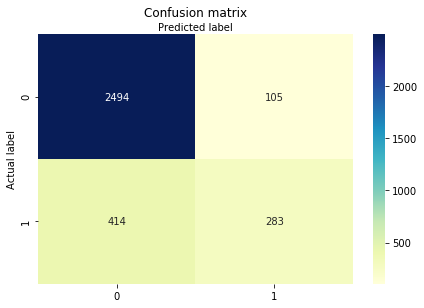

In [46]:
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
logreg_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8425364077669902
Precision: 0.729381443298969
Recall: 0.406025824964132


In [49]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      2599
         1.0       0.73      0.41      0.52       697

    accuracy                           0.84      3296
   macro avg       0.79      0.68      0.71      3296
weighted avg       0.83      0.84      0.82      3296



### AUC for Logistic Regression

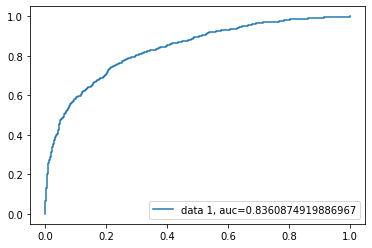

In [50]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [52]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2583,   16],
       [ 609,   88]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

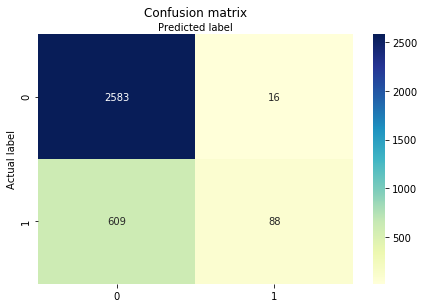

In [53]:
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [54]:
NB_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.810376213592233
Precision: 0.8461538461538461
Recall: 0.12625538020086083


In [55]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89      2599
         1.0       0.85      0.13      0.22       697

    accuracy                           0.81      3296
   macro avg       0.83      0.56      0.56      3296
weighted avg       0.82      0.81      0.75      3296



### AUC for Naive Bayes

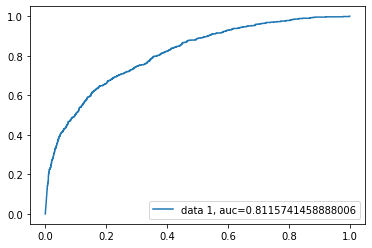

In [56]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred =  clf.predict(x_test)

In [58]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2261,  338],
       [ 375,  322]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

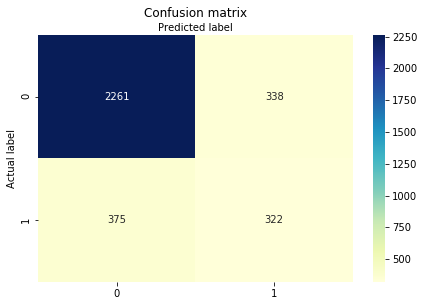

In [59]:
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [60]:
Decisiontree_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7836771844660194
Precision: 0.48787878787878786
Recall: 0.4619799139167862


In [61]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      2599
         1.0       0.49      0.46      0.47       697

    accuracy                           0.78      3296
   macro avg       0.67      0.67      0.67      3296
weighted avg       0.78      0.78      0.78      3296



### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

ypred = model.predict(x_test)

In [63]:
cnf_matrix = metrics.confusion_matrix(y_test, ypred)
cnf_matrix

array([[2496,  103],
       [ 393,  304]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

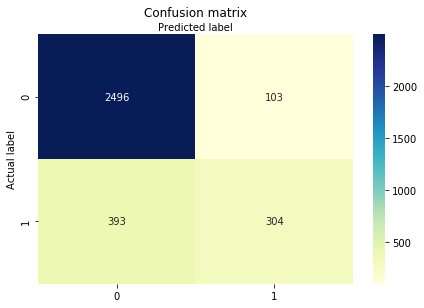

In [64]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [65]:
randomforest_accuracy = metrics.accuracy_score(y_test, ypred)
print("Accuracy:",metrics.accuracy_score(y_test, ypred))
print("Precision:",metrics.precision_score(y_test, ypred))
print("Recall:",metrics.recall_score(y_test, ypred))

Accuracy: 0.8495145631067961
Precision: 0.7469287469287469
Recall: 0.43615494978479197


In [66]:
print(metrics.classification_report(y_test, ypred))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      2599
         1.0       0.75      0.44      0.55       697

    accuracy                           0.85      3296
   macro avg       0.81      0.70      0.73      3296
weighted avg       0.84      0.85      0.83      3296



### AUC for Random Forest

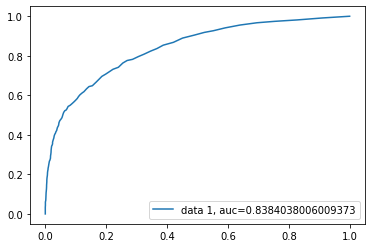

In [67]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### SVM with Liner Kernel

In [68]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [69]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2573,   26],
       [ 541,  156]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

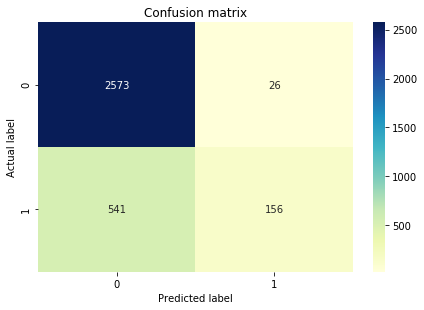

In [70]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [71]:
SVM_linear_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8279733009708737
Precision: 0.8571428571428571
Recall: 0.22381635581061693


In [72]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90      2599
         1.0       0.86      0.22      0.35       697

    accuracy                           0.83      3296
   macro avg       0.84      0.61      0.63      3296
weighted avg       0.83      0.83      0.79      3296



### SVM with RBF Kernel

In [73]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [74]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2532,   67],
       [ 460,  237]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

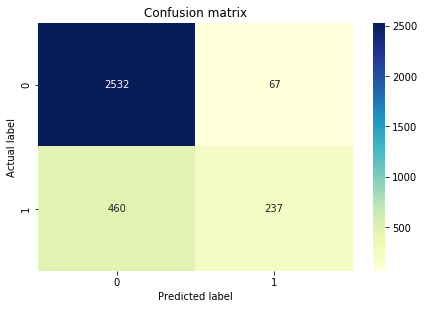

In [75]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [76]:
SVM_RBF_accuracy =  metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8401092233009708
Precision: 0.7796052631578947
Recall: 0.3400286944045911


In [77]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91      2599
         1.0       0.78      0.34      0.47       697

    accuracy                           0.84      3296
   macro avg       0.81      0.66      0.69      3296
weighted avg       0.83      0.84      0.81      3296



### XGBoost 

In [78]:
! pip install xgboost
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

You should consider upgrading via the 'c:\users\eswar\anaconda3\python.exe -m pip install --upgrade pip' command.


[13:00:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [79]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2468,  131],
       [ 366,  331]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

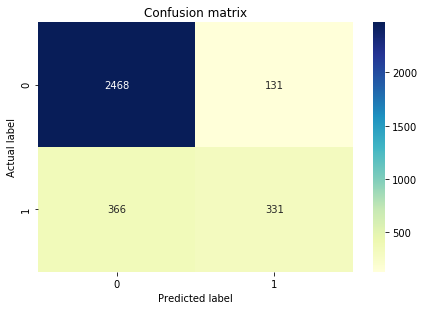

In [80]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [81]:
XGboost_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8492111650485437
Precision: 0.7164502164502164
Recall: 0.4748923959827834


In [82]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      2599
         1.0       0.72      0.47      0.57       697

    accuracy                           0.85      3296
   macro avg       0.79      0.71      0.74      3296
weighted avg       0.84      0.85      0.84      3296



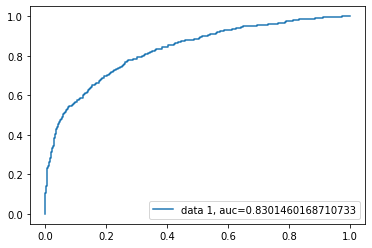

In [83]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [84]:
x = ['Logistic', 'Naive Bayes','Decision Tree','Random Forest','SVM-linear', 'SVM-RBF','XGBoost']
y = [logreg_accuracy,NB_accuracy,Decisiontree_accuracy,randomforest_accuracy,SVM_linear_accuracy,SVM_RBF_accuracy,XGboost_accuracy]

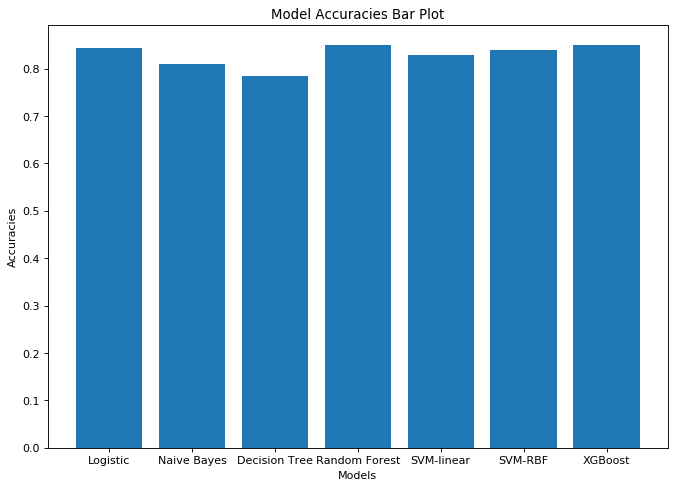

In [85]:
#Comparing the model accuracies in the below bar plot for each model:

from matplotlib.pyplot import figure

figure(figsize=(10, 7), dpi=80)
plt.bar(x,y)
plt.xlabel('Models')
plt.ylabel("Accuracies")
plt.title('Model Accuracies Bar Plot')
plt.show()

In [86]:
one_hot_encoded_data.Exited.value_counts()


0.0    7963
1.0    2022
Name: Exited, dtype: int64

#### Since the target values are not in same ratio, so when we build a model, the model is getting underfitted this leads to bias. To get  rid of this we are performing upsampling the minority target samples/ downsample the majority target samples

### Balancing the ratio of the values of Target Features

In [87]:
from sklearn.utils import resample
df_majority = one_hot_encoded_data[one_hot_encoded_data.Exited==0]
df_minority = one_hot_encoded_data[one_hot_encoded_data.Exited==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=7963,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Exited.value_counts()


0.0    7963
1.0    7963
Name: Exited, dtype: int64

##### we balanced the target features in equal ratio

In [88]:
from sklearn.model_selection import train_test_split
X = df_upsampled.drop(['RowNumber', 'CustomerId', 'Surname','Exited'], axis=1)
Y = df_upsampled[['Exited']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [89]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10670, 26)
(10670, 1)
(5256, 26)
(5256, 1)


### Random Forest After Sampling

In [90]:
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train, y_train)
 
# Predict on training set
pred_y = clf_rf.predict(x_test)

In [91]:
#print( metrics.accuracy_score(y_test, pred_y) )
print("Accuracy:",metrics.accuracy_score(y_test, pred_y))
print("Precision:",metrics.precision_score(y_test, pred_y))
print("Recall:",metrics.recall_score(y_test, pred_y))

Accuracy: 0.9288432267884322
Precision: 0.9058993847267462
Recall: 0.9564386702330914


In [92]:
print(metrics.classification_report(y_test, pred_y))

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93      2639
         1.0       0.91      0.96      0.93      2617

    accuracy                           0.93      5256
   macro avg       0.93      0.93      0.93      5256
weighted avg       0.93      0.93      0.93      5256



### AUC Curve

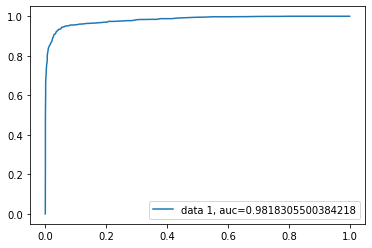

In [94]:
y_pred_proba = clf_rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### XGBoost

In [95]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

[13:03:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [96]:
feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp


NumOfProducts_2.0    0.260708
NumOfProducts_1.0    0.162225
Age                  0.069836
IsActiveMember       0.048850
Geography_Germany    0.043646
Balance              0.034663
Gender_Female        0.030634
Tenure_0.0           0.023058
Tenure_7.0           0.023055
Tenure_2.0           0.022500
EstimatedSalary      0.022168
Tenure_8.0           0.021963
Tenure_6.0           0.021573
Geography_France     0.021163
Tenure_10.0          0.020991
Tenure_3.0           0.019957
CreditScore          0.018524
Geography_Spain      0.018363
Tenure_1.0           0.018281
Tenure_4.0           0.018132
NumOfProducts_3.0    0.017755
Tenure_9.0           0.016483
HasCrCard            0.016262
Tenure_5.0           0.015076
NumOfProducts_4.0    0.014137
Gender_Male          0.000000
dtype: float32

No handles with labels found to put in legend.


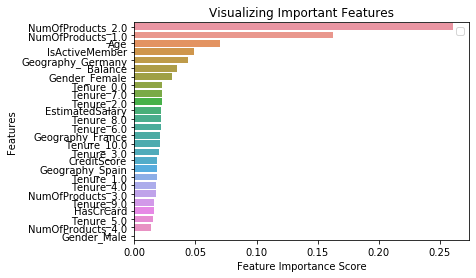

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [98]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2272,  367],
       [ 199, 2418]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

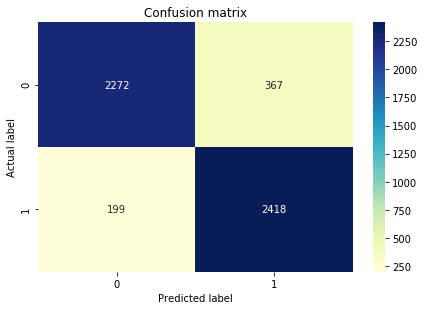

In [99]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [100]:
XGboost_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8923135464231354
Precision: 0.8682226211849192
Recall: 0.9239587313717997


In [101]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89      2639
         1.0       0.87      0.92      0.90      2617

    accuracy                           0.89      5256
   macro avg       0.89      0.89      0.89      5256
weighted avg       0.89      0.89      0.89      5256



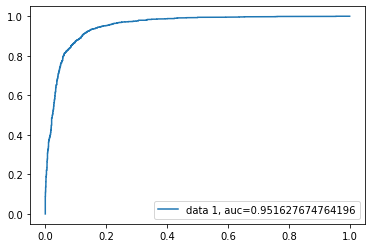

In [102]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Now the accuracy , precision, recall, and F1 score are boosted !!!! 